In [1]:
!pip install pymysql

In [1]:
import pymysql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
connection = pymysql.connect(
            host='localhost',
            user='root',
            password='sql123',
            database='amazon_sales')
connection

In [3]:
query="select * from amazon"
sales=pd.read_sql(query,connection)
sales.head()

C:\Users\ADMIN\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,Invoice_ID,Branch,City,Customer type,Gender,Product_line,Unit_price,Quantity,Vat,Total,date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating,timeofday,dayname,monthname
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,Afternoon,SAT,JAN
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6,Morning,FRI,MAR
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,Afternoon,SUN,MAR
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,Evening,SUN,JAN
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,Morning,FRI,FEB


In [48]:
sales.nunique()

Invoice_ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product_line                  6
Unit_price                  943
Quantity                     10
Vat                         990
Total                       990
date                         89
Time                        506
Payment                       3
cogs                        990
gross_margin_percentage       1
gross_income                990
Rating                       61
timeofday                     3
dayname                       7
monthname                     3
dtype: int64

## product analysis

In [49]:
unique= sales['Product_line'].unique()


In [50]:
for i in unique:
    print(i)

Health and beauty
Electronic accessories
Home and lifestyle
Sports and travel
Food and beverages
Fashion accessories


## quantities sold per product

In [51]:
query="select product_line, sum(quantity) as total_quantity from amazon group by product_line order by total_quantity desc"
no_quantity=pd.read_sql(query,connection)
no_quantity.index = range(1, len(no_quantity) + 1)
no_quantity

C:\Users\ADMIN\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,product_line,total_quantity
1,Electronic accessories,971.0
2,Food and beverages,952.0
3,Sports and travel,920.0
4,Home and lifestyle,911.0
5,Fashion accessories,902.0
6,Health and beauty,854.0


In [52]:

no_quantity['total_quantity'] = no_quantity['total_quantity'].astype(int)

print(no_quantity)


             product_line  total_quantity
1  Electronic accessories             971
2      Food and beverages             952
3       Sports and travel             920
4      Home and lifestyle             911
5     Fashion accessories             902
6       Health and beauty             854


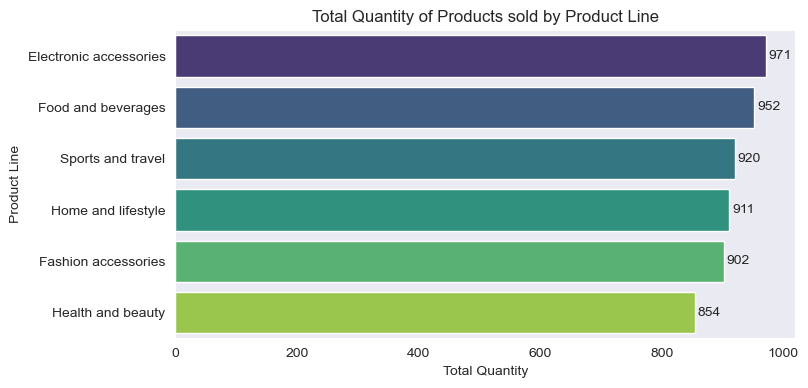

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set_style("dark")

# Plot
plt.figure(figsize=(8, 4))
ax = sns.barplot(x='total_quantity', y='product_line', data=no_quantity, palette='viridis')

# Add annotations
for p in ax.patches:
    ax.annotate(f"{p.get_width():.0f}", ((p.get_width() * 1.005), p.get_y() + p.get_height() / 2), ha='left', va='center')

plt.xlabel('Total Quantity')
plt.ylabel('Product Line')
plt.title('Total Quantity of Products sold by Product Line')
plt.show()


# -----------------------------------------------------------------------------------------

## revenue generated per product

In [56]:
query="select product_line, round(sum(total),3) as total_sales from amazon group by product_line order by total_sales desc"
revenue_per_product=pd.read_sql(query,connection)
revenue_per_product.index = range(1, len(no_quantity) + 1)
revenue_per_product

C:\Users\ADMIN\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,product_line,total_sales
1,Food and beverages,56144.844
2,Sports and travel,55122.826
3,Electronic accessories,54337.532
4,Fashion accessories,54305.895
5,Home and lifestyle,53861.913
6,Health and beauty,49193.739


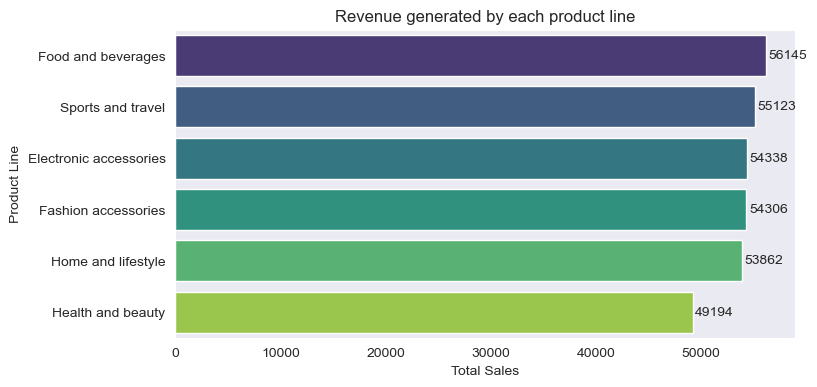

In [58]:
# Set the style
sns.set_style("dark")

# Plot
plt.figure(figsize=(8, 4))
ax = sns.barplot(x='total_sales', y='product_line', data=revenue_per_product, palette='viridis')

# Add annotations
for p in ax.patches:
    ax.annotate(f"{p.get_width():.0f}", ((p.get_width() * 1.005), p.get_y() + p.get_height() / 2), ha='left', va='center')

plt.xlabel('Total Sales')
plt.ylabel('Product Line')
plt.title('Revenue generated by each product line')
plt.show()

# --------------------------------------------------------------------------------------------------------------

## product distribution -- city wise

In [70]:
city_product_analysis = sales.pivot_table(index='City', columns='Product_line', values='Quantity', aggfunc='sum', fill_value=0)
print(city_product_analysis)


Product_line  Electronic accessories  Fashion accessories  Food and beverages  \
City                                                                            
Mandalay                         316                  297                 270   
Naypyitaw                        333                  342                 369   
Yangon                           322                  263                 313   

Product_line  Health and beauty  Home and lifestyle  Sports and travel  
City                                                                    
Mandalay                    320                 295                322  
Naypyitaw                   277                 245                265  
Yangon                      257                 371                333  


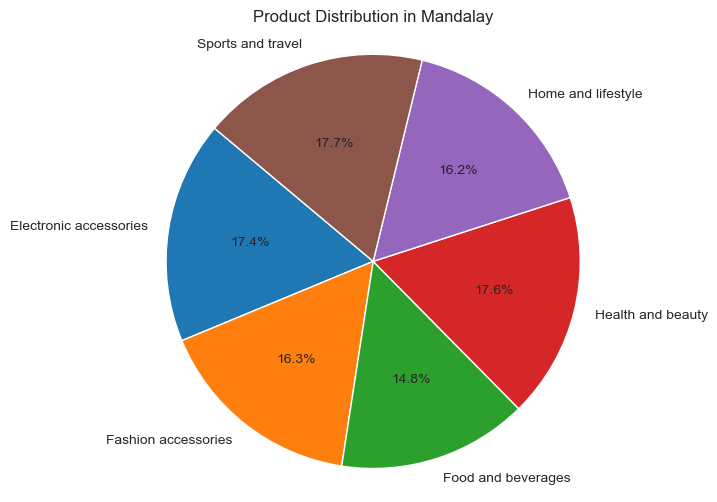

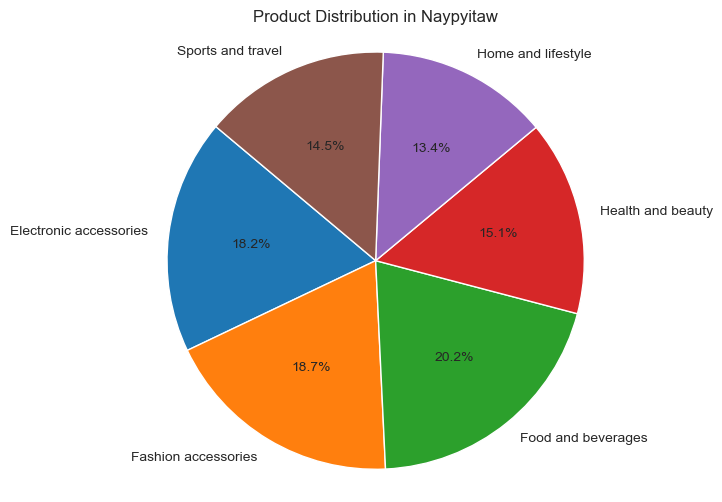

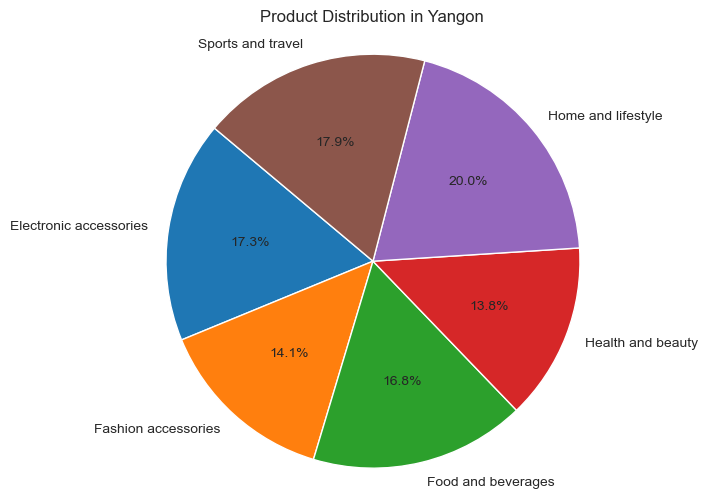

In [79]:
import matplotlib.pyplot as plt

# product distribution city wise
# iterate for each city
for city in city_product_analysis.index:
    city_data = city_product_analysis.loc[city]
    
    # pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(city_data, labels=city_data.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Product Distribution in {city}')
    plt.axis('equal')  
    plt.show()


# --------------------------------------------------------------------------------------------------------------

# customer analysis


##  Distribution of Customers Based on Gender

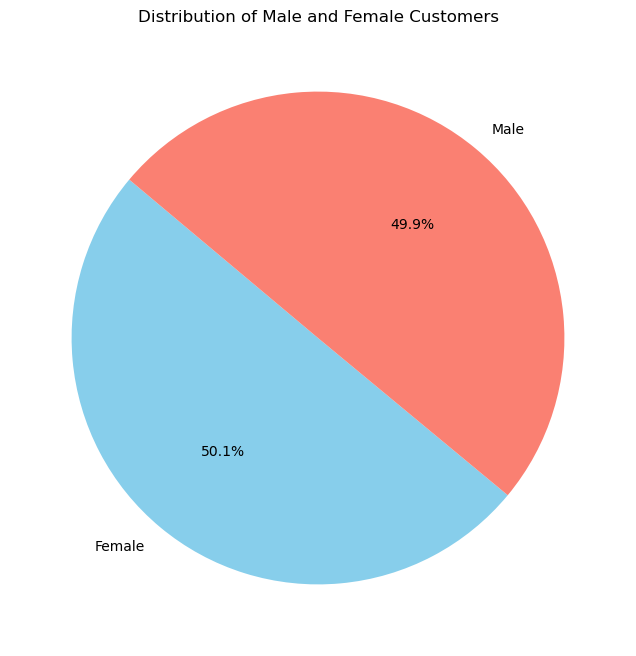

In [11]:
import matplotlib.pyplot as plt

# Count the number of male and female customers
gender_counts = sales['Gender'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon'])
plt.title('Distribution of Male and Female Customers')
plt.show()


# --------------------------------------------------------------------------------------------------------------

##  Distribution of  Gender for each Product Line

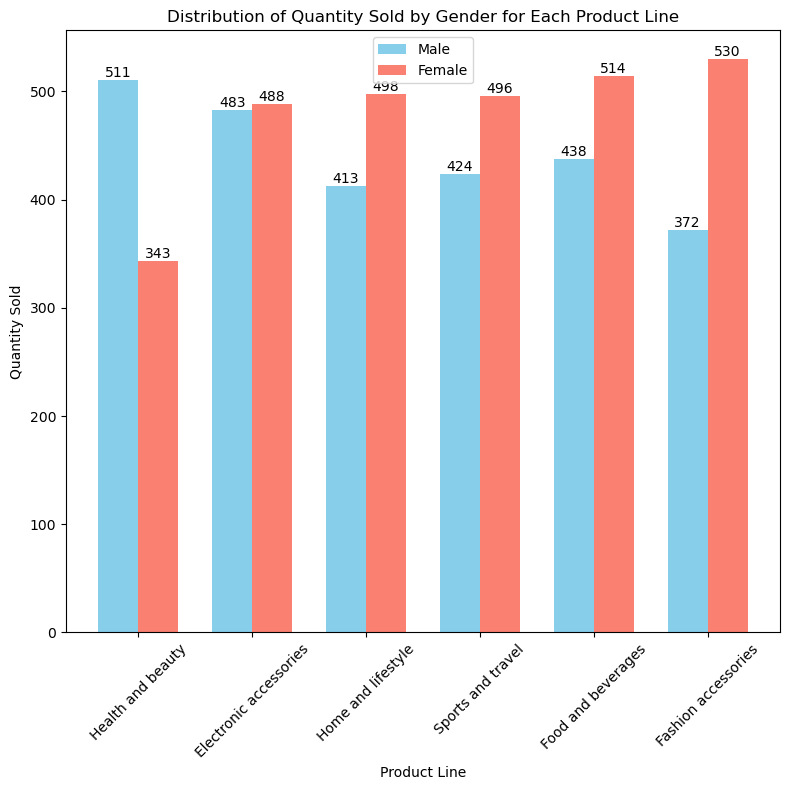

In [10]:

# Distribution of Quantity Sold by Gender for Each Product Line

#ploting bar graph

product_lines = sales['Product_line'].unique()


bar_width = 0.35
x = np.arange(len(product_lines))
colors = ['skyblue', 'salmon']
plt.figure(figsize=(8,8))


for i, product_line in enumerate(product_lines):
   
    male_data = sales.loc[(sales['Product_line'] == product_line) & (sales['Gender'] == 'Male'), 'Quantity'].sum()
    female_data = sales.loc[(sales['Product_line'] == product_line) & (sales['Gender'] == 'Female'), 'Quantity'].sum()

    # bar chart
    plt.bar(x[i] - bar_width/2, male_data, width=bar_width, label='Male', color=colors[0])
    plt.bar(x[i] + bar_width/2, female_data, width=bar_width, label='Female', color=colors[1])

    # annotations
    plt.text(x[i] - bar_width/2, male_data, str(male_data), ha='center', va='bottom')
    plt.text(x[i] + bar_width/2, female_data, str(female_data), ha='center', va='bottom')

plt.xlabel('Product Line')
plt.ylabel('Quantity Sold')
plt.title('Distribution of Quantity Sold by Gender for Each Product Line')
plt.xticks(ticks=x, labels=product_lines, rotation=45)

plt.legend(['Male', 'Female'], loc='best')

plt.tight_layout()
plt.show()


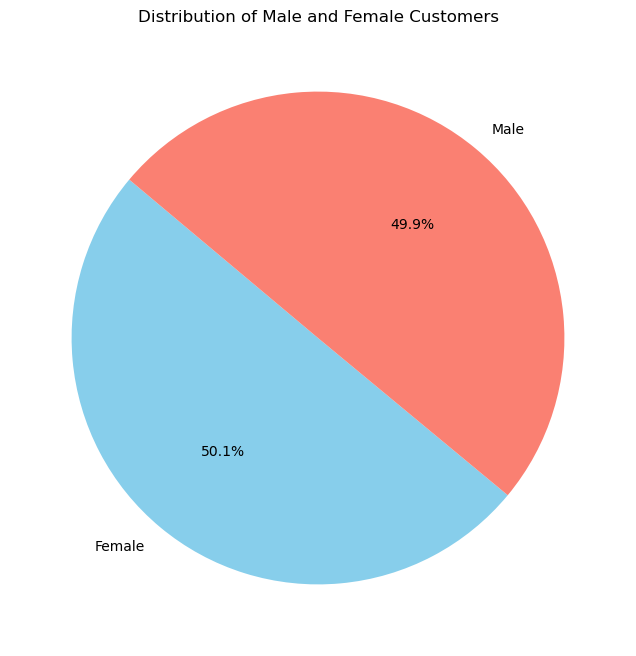

# --------------------------------------------------------------------------------------------------------------

# sales analysis

## Sales Trends Over Time

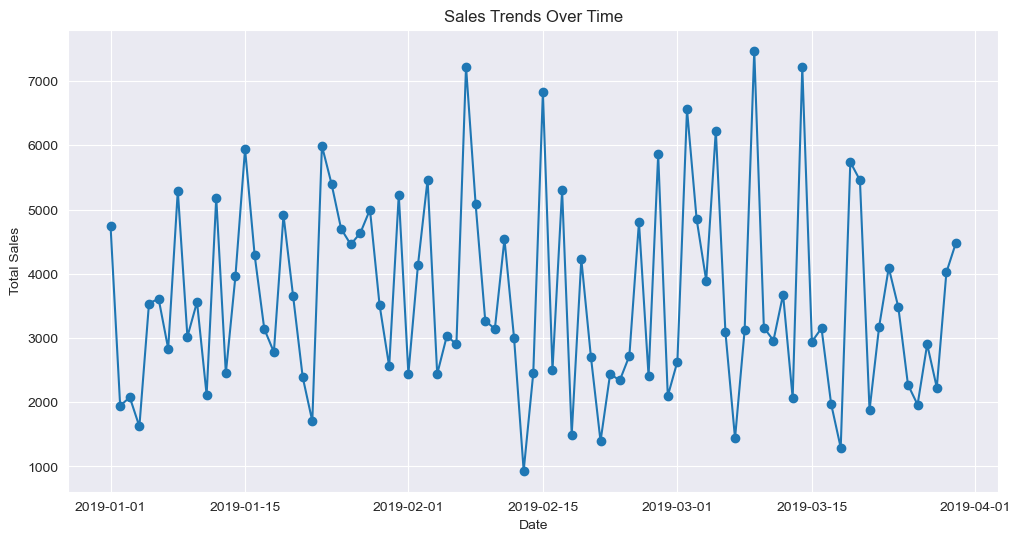

In [74]:
# Sales Trends Over Time

import matplotlib.pyplot as plt

sales['date'] = pd.to_datetime(sales['date'])

daily_sales = sales.groupby('date')['Total'].sum()

# sales trends over time
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values, marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Sales Trends Over Time')
plt.grid(True)
plt.show()


# --------------------------------------------------------------------------------------------------------------

## Distribution of Payment Methods


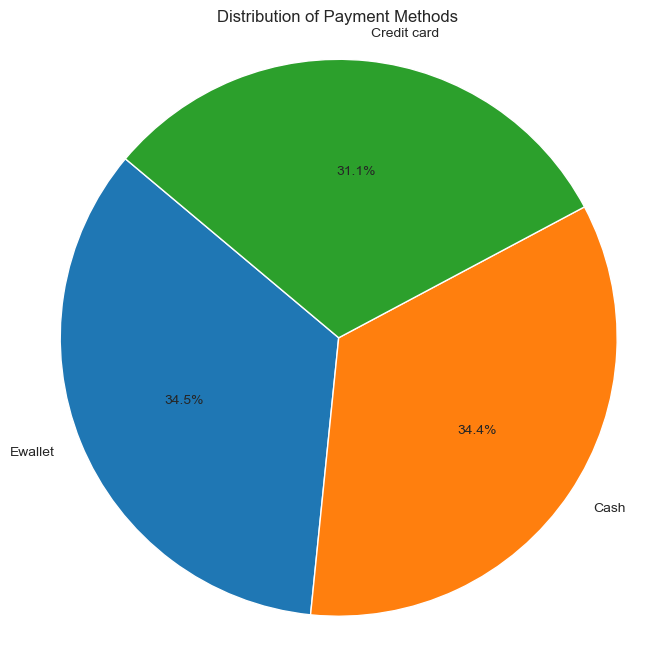

In [80]:
# Distribution of Payment Methods

payment_frequency = sales['Payment'].value_counts()

# Plotting the payment method distribution
plt.figure(figsize=(8, 8))
plt.pie(payment_frequency, labels=payment_frequency.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Payment Methods')
plt.axis('equal')  
plt.show()


# --------------------------------------------------------------------------------------------------------------

## Sales of Each Product Line for Each Month

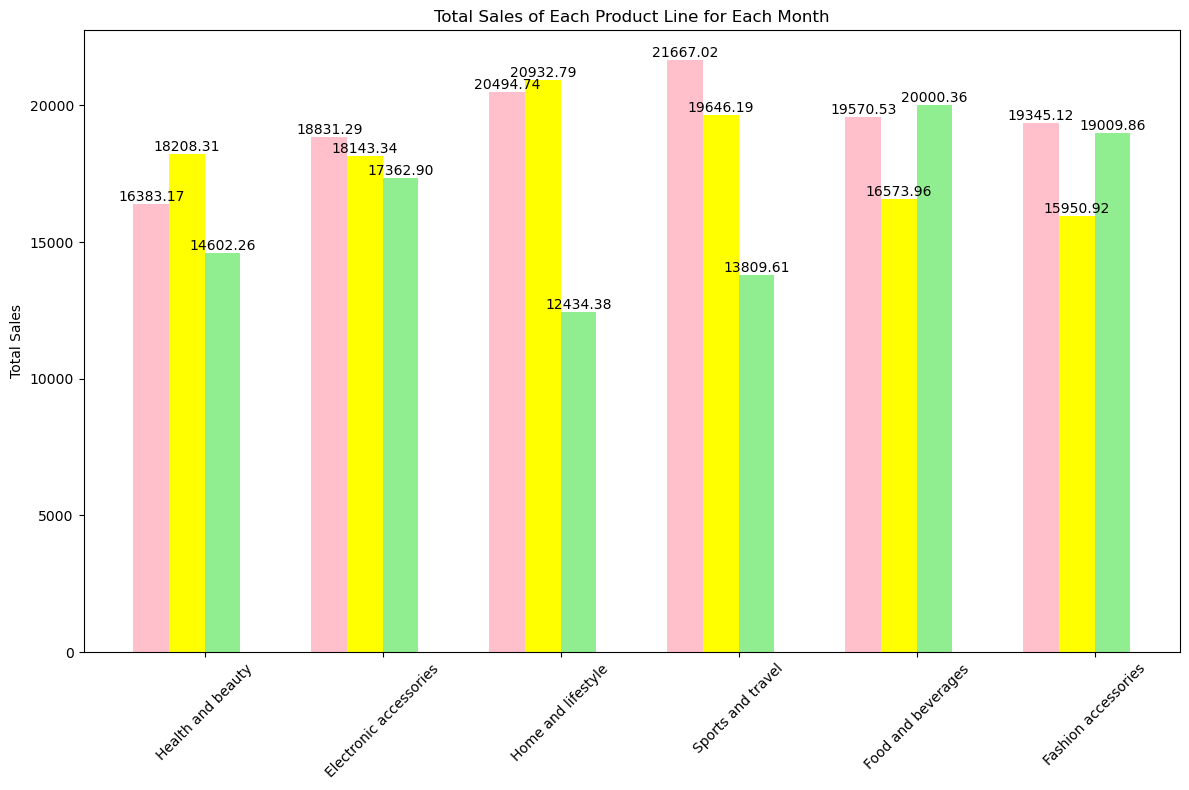

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# unique product lines
product_lines = sales['Product_line'].unique()

# unique month names
month_names = sales['monthname'].unique()

bar_width = 0.2

#  x locations for the groups
x = np.arange(len(product_lines))

colors = ['pink', 'yellow', 'lightgreen']

plt.figure(figsize=(12, 8))

for i, (month_name, color) in enumerate(zip(month_names, colors)):
    # Filter data for the current month name
    month_data = sales[sales['monthname'] == month_name]
    
    # Calculating  the x-coordinate for bars of the current month
    x_month = x + (bar_width * i)
    
    # Iterate over each product line
    for j, product_line in enumerate(product_lines):
        # total sales for the current product line and month
        total_sales = month_data[month_data['Product_line'] == product_line]['Total'].sum()
        
        # Ploting bar chart
        plt.bar(x_month[j], total_sales, width=bar_width, label=f'{month_name}', color=color)
        
        #annotations
        plt.text(x_month[j], total_sales, f"{total_sales:.2f}", ha='center', va='bottom')

#x-axis labels
plt.xticks(ticks=x + (bar_width * len(month_names)) / 2, labels=product_lines, rotation=45)

#  y-axis label
plt.ylabel('Total Sales')

# title
plt.title('Total Sales of Each Product Line for Each Month')

# plot
plt.tight_layout()
plt.show()


# --------------------------------------------------------------------------------------------------------------

## Sales based on cities

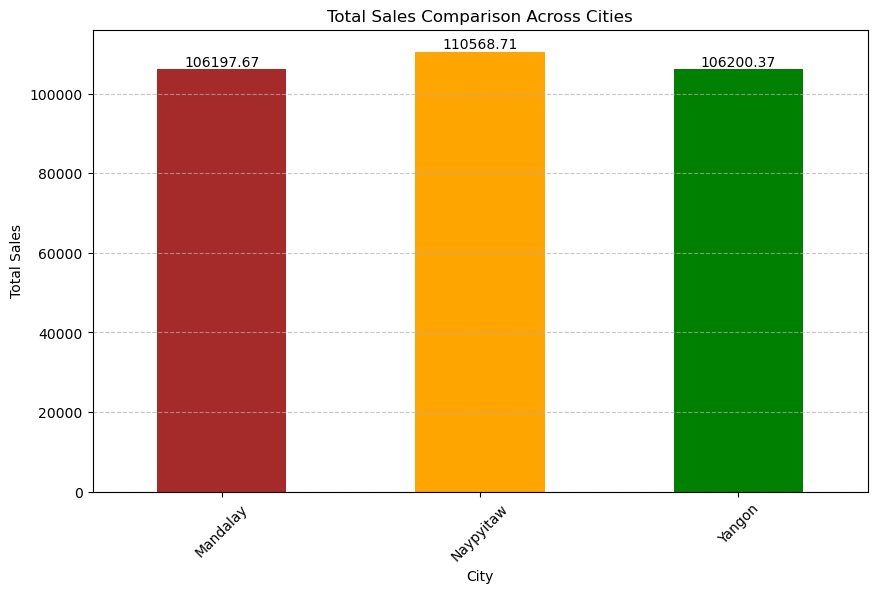

In [29]:
import matplotlib.pyplot as plt

# grouping  by city and summing up the total sales for each city
city_sales = sales.groupby('City')['Total'].sum()

# plotting the total sales for each city
plt.figure(figsize=(10, 6))
bars = city_sales.plot(kind='bar', color=['brown', 'orange', 'green'])
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.title('Total Sales Comparison Across Cities')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# annotations 
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             f"{bar.get_height():.2f}", ha='center', va='bottom')

plt.show()


# --------------------------------------------------------------------------------------------------------------

##  Sales based on Time of Day

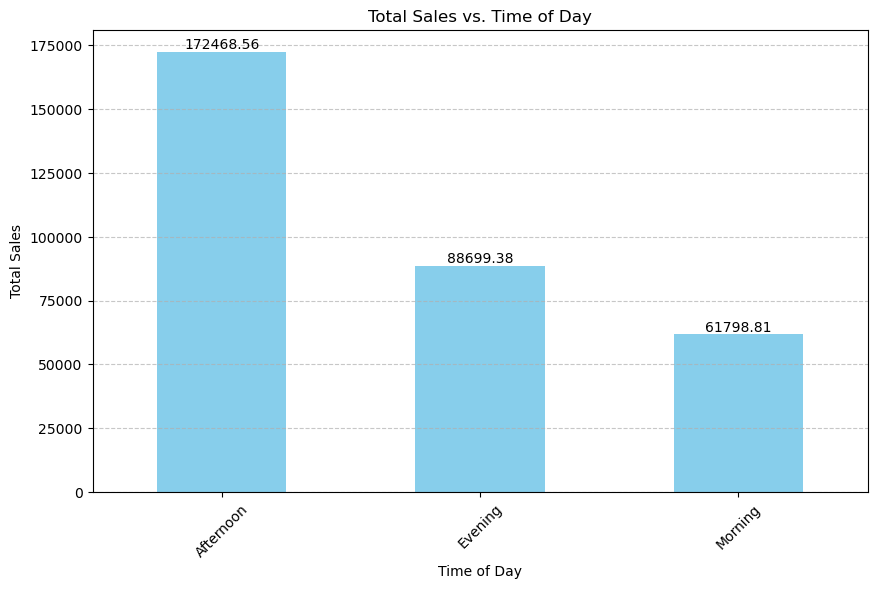

In [9]:

timeofday_sales = sales.groupby('timeofday')['Total'].sum()

# Plotting the total sales for each time of day
plt.figure(figsize=(10, 6))
bars = timeofday_sales.plot(kind='bar', color='skyblue')
plt.xlabel('Time of Day')
plt.ylabel('Total Sales')
plt.title('Total Sales vs. Time of Day')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

#  annotations
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             f"{bar.get_height():.2f}", ha='center', va='bottom')

plt.show()



# --------------------------------------------------------------------------------------------------------------

## Sales based on  Day of the Week

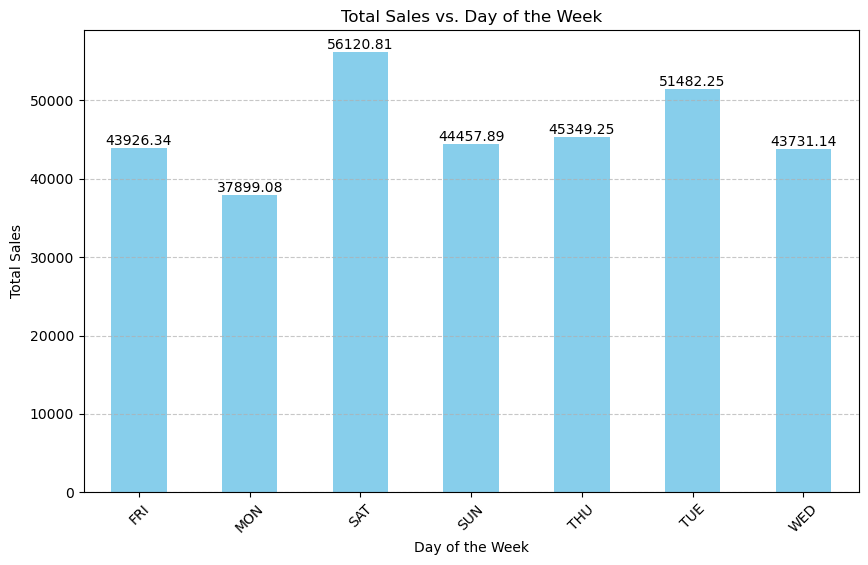

In [7]:

day_sales = sales.groupby('dayname')['Total'].sum()

plt.figure(figsize=(10, 6))
bars = day_sales.plot(kind='bar', color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.title('Total Sales vs. Day of the Week')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             f"{bar.get_height():.2f}", ha='center', va='bottom')

plt.show()


# --------------------------------------------------------------------------------------------------------------

##  Sales based on Month

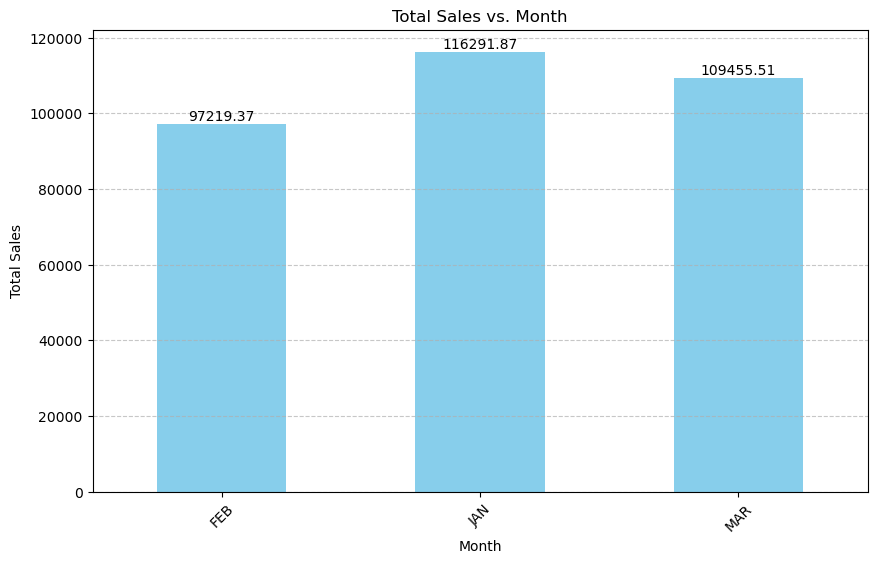

In [8]:

month_sales = sales.groupby('monthname')['Total'].sum()

# Plotting the total sales for each month
plt.figure(figsize=(10, 6))
bars = month_sales.plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales vs. Month')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add annotations to display the corresponding numbers at the end of each bar
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             f"{bar.get_height():.2f}", ha='center', va='bottom')

plt.show()

